In [54]:
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
import h5py
from matplotlib import pyplot as plt
import networkx as nx
from features.image_processor import ImageProcessor, FeatureDescriptors, Matcher
from features.track_builder_v2 import TrackBuilder
from features.feature_patch_extractor import FeaturePatchExtractor
import random
from features.colmap_database_reader import COLMAPExtractor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
path_to_images = "dataset/Compressed_buddha"
visualize_tracks = True
max_images = None
verbose = True


# Provide the path to your COLMAP SQLite database file
db_file_path = "colmap_run/buddha.db"
extractor = COLMAPExtractor(db_file_path)
# Extract data using COLMAPExtractor
extractor = COLMAPExtractor(db_file_path)
keypoints = extractor.get_keypoints()
descriptors = extractor.get_descriptors()
images = extractor.get_images()
# Extract matches
matches = extractor.get_matches()
two_view_geometries = extractor.get_two_view_geometries()
extractor.close()

In [10]:
# Create TrackBuilder instance
track_builder = TrackBuilder()

for img_id in images.keys():
    track_builder.add_keypoints_and_descriptors(
        img_id, keypoints[img_id], descriptors[img_id], is_colmap_keypoints=True
    )

for pair, match_data in matches.items():
    img_id1, img_id2 = pair
    track_builder.add_matches(
        img_id1, img_id2, match_data, descriptors[img_id1], descriptors[img_id2]
    )

# Extract tracks
tracks = track_builder.extract_tracks()

/home/exmachina/NEU/Computer_Vision/Project/CV_project/Deep-Learning-based-Feature-Matching/features/track_builder_v2.py:42: RuntimeWarning: invalid value encountered in scalar divide
  similarity = np.dot(desc1, desc2) / (


In [13]:
TrackBuilder.save(tracks, "features/data/tracks_23_04_2024.db", format="pickle")

Tracks saved to features/data/tracks_23_04_2024.db in PICKLE format.


In [14]:
tracks_pickle_file = TrackBuilder.load("features/data/tracks_23_04_2024.db")

In [51]:
def visualize_track_with_keypoints(
    track, images, keypoints, max_images_per_row=5, mark_keypoints=True
):
    """
    Visualizes images in a track with keypoints marked (optional).

    Args:
        images: Dictionary mapping image IDs (or names) to image data (e.g., NumPy arrays).
        track: A single track (list of node IDs or names).
        max_images_per_row: Maximum number of images to display in a row.
        mark_keypoints: Flag to indicate whether to mark keypoints (default: False).
    """

    num_images = len(track)
    num_rows = (num_images + max_images_per_row - 1) // max_images_per_row
    fig, axes = plt.subplots(num_rows, max_images_per_row, figsize=(12, num_rows * 3))

    for i in range(len(track)):
        image_row = i // max_images_per_row
        image_col = i % max_images_per_row
        ax = axes[image_row, image_col]

        image_id = track[i][0]
        keypoint_id = track[i][1]
        image_path = f"dataset/Compressed_buddha/{images[image_id]['name']}.png"
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if mark_keypoints:
            kp = keypoints[image_id][keypoint_id]
            x, y = kp
            cv2.circle(
                image, (int(x), int(y)), 2, (255, 255, 0), 20
            )  # Draw red circle around keypoint

        ax.imshow(image)
        ax.set_title(f"Image {image_id}")
        ax.axis("off")

    fig.suptitle(f"Track with {num_images} images (max {max_images_per_row} per row)")
    plt.tight_layout()
    plt.show()

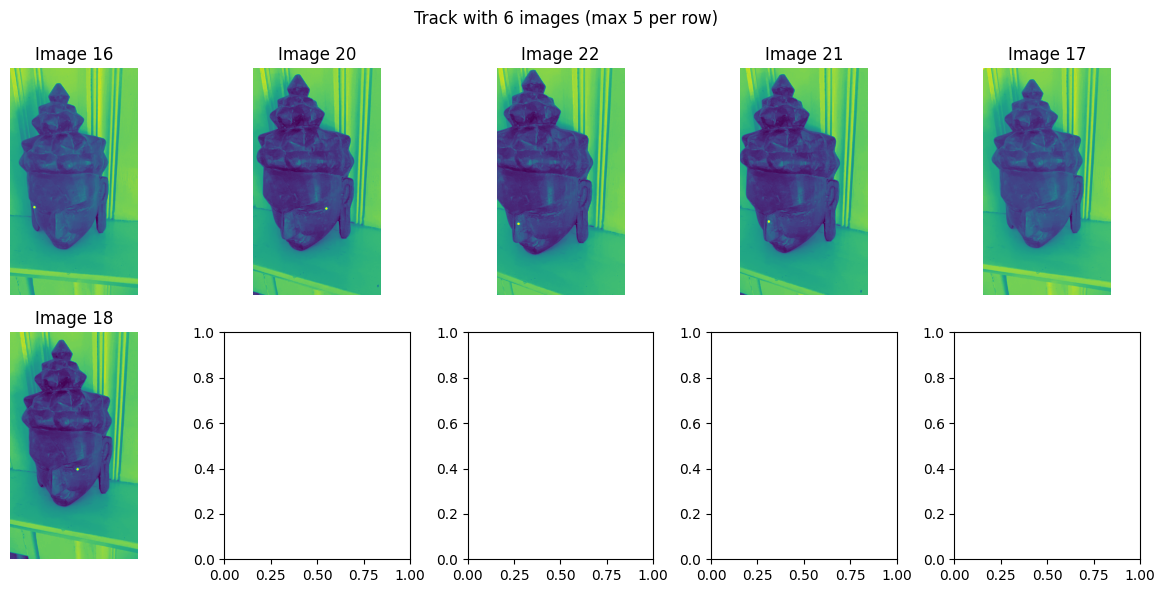

In [52]:
from random import sample  # for random track selection

# Filter tracks with at least 6 images
long_tracks = [track for track in tracks_pickle_file if len(track) >= 6]
if long_tracks:
    selected_track = sample(long_tracks, 1)[0]

visualize_track_with_keypoints(selected_track, images, keypoints)

In [77]:
fpe = FeaturePatchExtractor("output")
all_patches = []
image_ids = [images[img_id]["name"] for img_id, kp_id in selected_track]
kps = [keypoints[img_id][kp_id] for img_id, kp_id in selected_track]


# Extract patch using feature extractor
for image_id, kp in zip(image_ids, kps):
    patch = fpe.get_single_patch(image_id, kp)
    print(patch.shape)
all_patches.append(patch)

Feature map shape: (128, 1920, 1080)
Start and End Location of patch (x): (198, 214)
Start and End Location of patch (y): (1169, 1185)
Keypoint Location :: (206, 1177)
(128, 16, 16)
Feature map shape: (128, 1920, 1080)
Start and End Location of patch (x): (611, 627)
Start and End Location of patch (y): (1180, 1196)
Keypoint Location :: (619, 1188)
(128, 16, 16)
Feature map shape: (128, 1920, 1080)
Start and End Location of patch (x): (173, 189)
Start and End Location of patch (y): (1309, 1325)
Keypoint Location :: (181, 1317)
(128, 16, 16)
Feature map shape: (128, 1920, 1080)
Start and End Location of patch (x): (235, 251)
Start and End Location of patch (y): (1290, 1306)
Keypoint Location :: (243, 1298)
(128, 16, 16)
Feature map shape: (128, 1920, 1080)
Start and End Location of patch (x): (0, 16)
Start and End Location of patch (y): (0, 16)
Keypoint Location :: (0, 1)
(128, 16, 16)
Feature map shape: (128, 1920, 1080)
Start and End Location of patch (x): (562, 578)
Start and End Loca